# 机器学习入门课程 II

## 前言

### 准备

这是一门给机器学习零基础的人的入门课程，学习此课程希望您具有以下基础。

- 高等数学或微积分，能够熟练地计算函数的导数以及链式求导法则
- 线性代数，熟悉矩阵计算
- 熟悉 Python 的基础语法

原则上，不需要其他额外的数学知识。在这门课中，您将学到：

- 机器学习可以用来做什么？
- 对于一个具体问题，如何建立一个模型进行预测？

### 进一步学习

如果在这门课程之后，想进一步学习机器学习的知识，推荐以下资源：

1. 机器学习(cs229简化版) Andrew Ng <https://www.coursera.org/learn/machine-learning>
2. 《机器学习》 周志华
3. 熟读理论千百遍，不如动手去实践,Kaggle比赛 <https://www.kaggle.com/competitions>


## 复习

在上一次课程中，介绍了机器学习的基本概率和机器学习到底是做什么的，并举了一个简单的例子进行说明。归纳起来要点如下：

1. 机器学习是实现人工智能的一种方法，其本质是 **利用算法从数据中自动归纳出有价值的知识的一种方法**。
2. 机器学习的本质是在学习一个 **数学函数**。

在这次课中，您将了解更多的模型，如逻辑回归、线性回归、支持向量机(SVM)、神经网络等。

## 监督学习的两类基本问题


所谓的监督学习，就是将你要用算法学习到的特征数据$ \mathbf{x} = (x_1, x_2, ..., x_n)$和标签数据$y$都给定了，需要用算法拟合一个指定的函数$\hat{y} = f(\mathbf{x})$。与之相对的是无监督学习，只有特征数据$ \mathbf{x} $ 而没有标签，要算法自己去归纳标签。

- 例子：
    1. 建立一个模型，根据某个城市不同地区的各地区房屋的相关信息，预测房屋的价格，如果价格信息，那么这是一个监督学习任务。
    2. 如果不知道房屋价格，需要根据房屋本身的属性，根据相似性将房屋分为若干类，那么这是一个无监督学习任务。
    
监督学习根据标签$y$的不同分为两大类：分类和回归。如果$y \in Y$，$Y$是一个有限集合，例如$Y = \{ +1, -1\}$，那么这是一个分类任务；
如果$Y$是一个无限集合，例如$Y = R , Z$，那么是一个回归问题。
可见，分类还是回归取决于标签的类型。

- 例子：
    1. 建立一个模型，根据某个城市不同地区的各地区房屋的相关信息，预测房屋的价格，如果价格信息，那么这是一个回归问题。
    2. 建立一个模型，根据用户行为，预测用户是男性还是女性，那么这是一个分类问题。
    3. 建立一个模型，根据某个城市不同地区的各地区房屋的相关信息，预测房屋的价格未来是涨还是跌，那么这是一个？？？问题



## 线性模型

### 数据集

本任务采用鸢尾花(iris)数据集，你可以从UCI网站上下载https://archive.ics.uci.edu/ml/datasets/Iris。 如果已经安装了 scikit-learn，那么可以利用提供的dataset接口直接调用。 鸢尾花数据集是著名的统计学家 Fisher 提供的。 下面我们用一段简单的Python代码加载该数据集看一看。


该数据集的每一条记录代表一个样本，每一个样本有4个属性变量：

- sepal length (cm) 萼片长度
- sepal width (cm) 萼片宽度
- petal length (cm) 花瓣长度
- petal width (cm) 花瓣宽度

每一个样本有1个目标变量target，target有3个取值，每一种取值的意义如下：

- 0： setosa 山鸢尾 
- 1： versicolor 变色鸢尾
- 2： virginica 维吉尼亚鸢尾

每一种鸢尾花的图片如下，从左到右分别是 setosa,versicolor,virginica

<img alt="setosa" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/86/Iris_setosa.JPG/800px-Iris_setosa.JPG" width="300" style="float:left; margin-right:10px;"/>
<img alt="versicolor" src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/27/Blue_Flag%2C_Ottawa.jpg/800px-Blue_Flag%2C_Ottawa.jpg" width="300" style="float:left; margin-right:10px;"/>
<img alt="virginica" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/1024px-Iris_virginica.jpg" width="300" style="float:left; margin-right:10px;"/>


### 线性分类

为简单起见，我们从二分类开始，以iris数据集，根据花瓣的4个属性，建立模型预测是否为setosa这种花。用$y=-1$表示不是setosa，用$y=+1$表示是setosa。
因此，变迁变量$Y = \{-1, +1\}$是一个二元集合，因此是一个分类问题。

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

plt.style.use('seaborn-talk')

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = (iris.target == 0).astype(int)

# 随机选取几条数据
idx = range(df.shape[0])
np.random.shuffle(idx)

print iris.target_names
df.iloc[idx].head(10)


['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
77,6.7,3.0,5.0,1.7,0
95,5.7,3.0,4.2,1.2,0
58,6.6,2.9,4.6,1.3,0
136,6.3,3.4,5.6,2.4,0
118,7.7,2.6,6.9,2.3,0
66,5.6,3.0,4.5,1.5,0
92,5.8,2.6,4.0,1.2,0
116,6.5,3.0,5.5,1.8,0
24,4.8,3.4,1.9,0.2,1
100,6.3,3.3,6.0,2.5,0


如果我们根据$x_1$ `petal length (cm)`和$x_2$ `petal width (cm)`这两个变量，将数据画在一个二维平面上，可以看出，很容易找到一个超平面（直线）将这两类数据分开。并且，这样的超平面有很多个！超平面方程可以表达为：

$$
\mathbf{w}^T \mathbf{x} + b = 0
$$

因此，一个简单的分类函数可以表示为：

$$
\hat{y} = sgn(\mathbf{w}^T \mathbf{x} + b)
$$

本例中，两个可能的超平面方程分别为：


$$
x_1 + x_2 - 3 = 0 \quad\quad (\text{绿色})
$$

$$
0.8 x_1 + x_2 - 3 = 0 \quad\quad (\text{红色})
$$

机器学习是从数据中归纳出规律，在这里的具体表现就是从这一堆已知的数据中确定超平面方程里面的参数$\mathbf{w}$ 和 $b$。

由于这里的分类面是超平面，它对应的分类函数是线性函数，所以称为 **线性分类模型**！

不同的线性模型的区别就是确定这些参数的方法的不同，目前已被广泛应用的线性分类模型有 **感知器**、**逻辑回归(LR)**、**支持向量机(SVM)**。

看待线性模型的另外一个角度是，对不同的特征加权打分，将多维度的特征得分融合成一个分数（即做了一个投影），然后根据这一个分数进行分类。

Text(2,1.6,u'\u5206\u7c7b\u9762: $0.8 x_1 + x_2 - 3 = 0$')

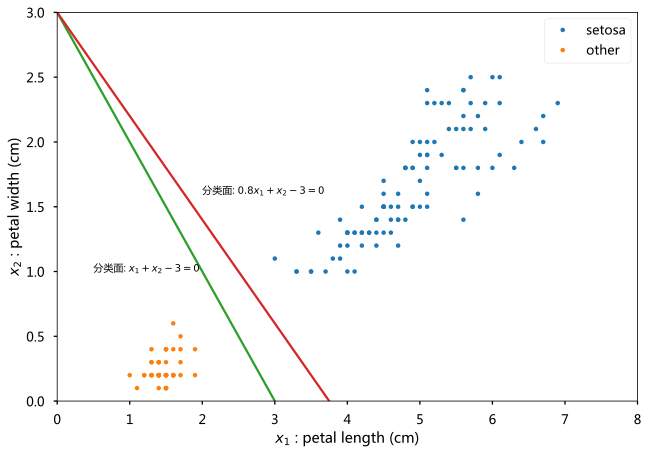

In [2]:
ax = plt.gca()
df.groupby(by='target').plot(kind='line', x='petal length (cm)', y='petal width (cm)', style='.', ax=ax)
ax.set_xlim([0,8])
ax.set_ylim([0,3])
plt.legend((iris.target_names[0], 'other'), loc='best')
plt.xlabel('$x_1$ : petal length (cm)')
plt.ylabel('$x_2$ : petal width (cm)')

x = np.linspace(0, 8, 100)
y = 3 -x 
plt.plot(x, y)
plt.text(0.5, 1, u'分类面: $x_1 + x_2 - 3 = 0$')

x = np.linspace(0, 8, 100)
y = 3 -0.8*x 
plt.plot(x, y)
plt.text(2, 1.6, u'分类面: $0.8 x_1 + x_2 - 3 = 0$')

### 线性回归

为简单起见，我们用 $x$ `petal length`作为特征，预测$y$ `petal width`的值，这里标签是一个连续值，因此是一个回归问题。
很容易找到一条直线 $\hat{y} = w x + b$ 拟合这两个变量，其中确定参数$w$和$b$的一种方法是[**高斯最小二乘法**](https://en.wikipedia.org/wiki/Least_squares)，即最小化拟合误差

$$
J(w, b) = \frac{1}{N} \sum_i (w x_i + b - y_i)^2
$$

求解的方法就是令上述函数的梯度等于0，然后解方程

$$
\frac{\partial{J(w, b)}}{\partial{w}} = 0, \frac{\partial{J(w, b)}}{\partial{b}} = 0
$$

Text(0.5,1,u'\u56de\u5f52\u76f4\u7ebf: $\\hat{y} = 0.4 x - 0.3$')

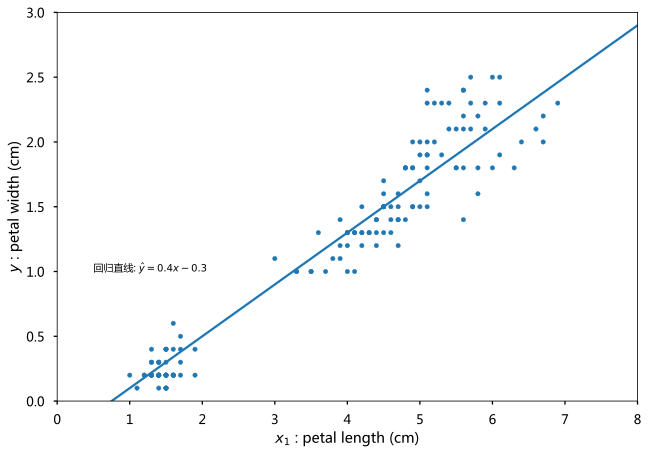

In [3]:
ax = plt.gca()
df.plot(kind='scatter', x='petal length (cm)', y='petal width (cm)', ax=ax)
ax.set_xlim([0,8])
ax.set_ylim([0,3])

plt.xlabel('$x_1$ : petal length (cm)')
plt.ylabel('$y$ : petal width (cm)')


x = np.linspace(0, 8, 100)
y = 0.4*x - 0.3
plt.plot(x, y)
plt.text(0.5, 1, u'回归直线: $\hat{y} = 0.4 x - 0.3$')

## 非线性模型

### 线性不可分 & 线性无关

前面我们用一个分类的例子，展示两个不同类别的数据，如何被一个超平面分开的。但是，并不是所有的数据都能被超平面分开，确切地说，几乎所有的数据都难以被超平面分开！例如，如果我们将target定义为是否为 versicolor 这种花，那么我们将数据画在petal length和petal width平面的时候，就可以发现，这两类无法被超平面区分开！这种数据，我们称作线性不可分！


Text(0,0.5,u'$x_2$ : petal width (cm)')

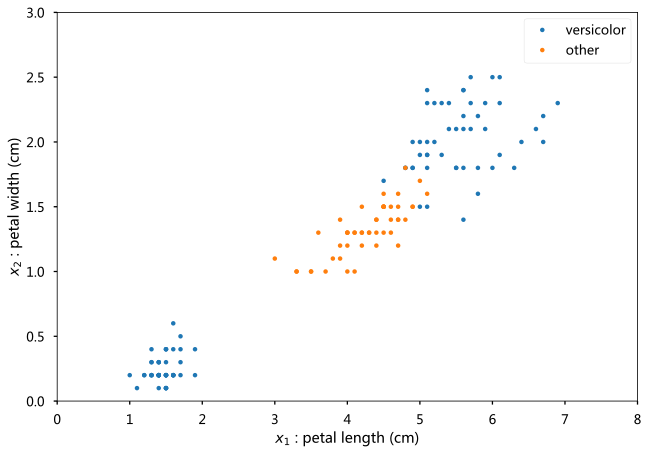

In [4]:
df['target'] = (iris.target == 1).astype(int)

ax = plt.gca()
df.groupby(by='target').plot(kind='line', x='petal length (cm)', y='petal width (cm)', style='.', ax=ax)
ax.set_xlim([0,8])
ax.set_ylim([0,3])
plt.legend((iris.target_names[1], 'other'), loc='best')
plt.xlabel('$x_1$ : petal length (cm)')
plt.ylabel('$x_2$ : petal width (cm)')

同样，对于回归问题，也存在特征与目标变量显现相关性很低的情况。比如，如果我们用petal length来预测sepal width，将数据画在二维平面，可以看到，很难用一条直线这两个变量拟合到一起！这种情况，我们称作线性相关性低！这种相关性可以用[相关系数](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient)来度量。如果这个系数很低，就称作线性无关！

Text(0,0.5,u'$y$ : sepal width (cm)')

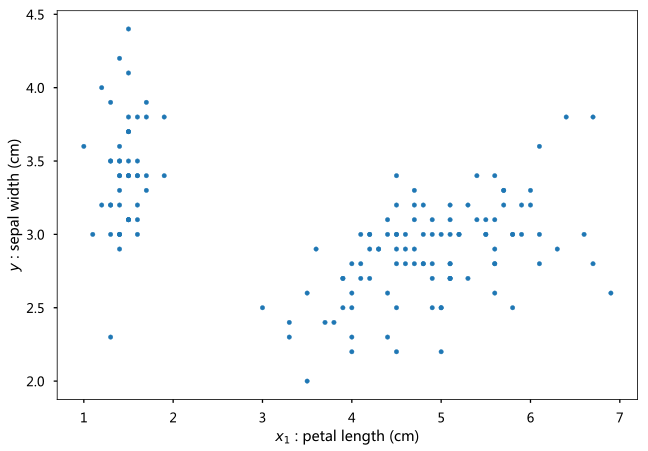

In [5]:
ax = plt.gca()
df.plot(kind='scatter', x='petal length (cm)', y='sepal width (cm)', ax=ax)

plt.xlabel('$x_1$ : petal length (cm)')
plt.ylabel('$y$ : sepal width (cm)')

对于线性不可分和线性相关性低的数据，很难用线性模型拟合，对此，通常有两种做法！

1. 增加新的变量，将特征空间变成更高的维度，使得在高维空间是线性可分的！
2. 利用 **非线性模型** ！


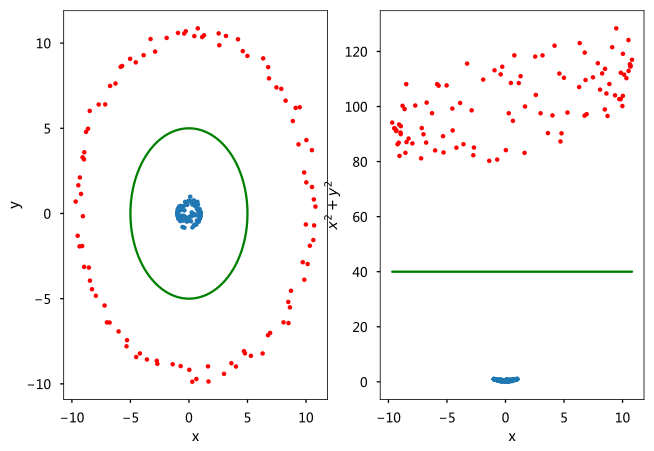

In [6]:
plt.subplot(121)

t = np.linspace(0,1,100)
x = np.cos(t*2*np.pi)
y = np.sin(t*2*np.pi) * np.random.rand(100)

plt.plot(x,y, '.')

t2 = np.linspace(0,1,100)
x2 = np.sin(t*2*np.pi)*10 + np.random.rand(100)
y2 = np.cos(t*2*np.pi)*10 + np.random.rand(100)
plt.plot(x2,y2, 'r.')

t3 = np.linspace(0,1,100)
x3 = np.sin(t*2*np.pi)*5 
y3 = np.cos(t*2*np.pi)*5 
plt.plot(x3,y3, 'g')

plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
plt.plot(x,y*y+x*x, '.')
plt.plot(x2,y2*y2+x2*x2, 'r.')
plt.xlabel('x')
plt.ylabel('$x^2+y^2$')

plt.plot(x2, x2*0+40, 'g')

### 神经网络

神经网络是一种非线性模型，其基本组成单元是神经元，每一个神经元的输出是输入的加权和然后经过一个非线性变换得到的。这个非线性变换称作 **激活函数**。每一个神经元可以看做有特定功能的模块，例如下图的中间的隐层代表多个神经元。对于人脸识别任务，线性模型接受所有的像素点的值，然后加权打分，判决输出是否为人脸；而神经网络先用多个神经元，每个神经元识别一个特性，比如第一个神经元识别是否有鼻子，第二个识别是否有眼睛，等等，然后在这之上，在用一个线性模型加权打分判决输出是否为人脸！

$$
z_j = \sum_i w_i x_i + b \\
out_j = \sigma(z_j)
$$


![神经网络](https://upload.wikimedia.org/wikipedia/commons/4/46/Colored_neural_network.svg)

有多种激活函数，常见的有 sigmoid，tanh, relu

$$
sigmoid = \frac{1}{1+e^{-x}} \\
tanh = tanh(x) \\
relu = max(0, x)
$$

<img src="https://upload.wikimedia.org/wikipedia/commons/5/5b/Activation_logistic.svg" width="300" style="float:left;margin-right:10px" />
<img src="https://upload.wikimedia.org/wikipedia/commons/c/cb/Activation_tanh.svg" width="300" style="float:left;margin-right:10px"/>
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fe/Activation_rectified_linear.svg" width="300" style="float:left;margin-right:10px"/>



神经网络由于引入了非线性运算，因此可以对输入做非线性变换，就有可能将原来线性不可分的数据区分开！如果没有非线性激活函数，堆叠再多也是对输入做线性变换！

神经网络前面的层的作用是，**将原本线性不可分的数据通过非线性变换变成了线性可分的数据**。

![神经网络将线性不可分变成线性可分](nn-explain.png)


**单隐层的神经网络只要增加隐层神经元的个数，就可以对任意函数以任意精度逼近**！机器学习本质上就是在拟合一个函数，而神经网络具有强大的拟合能力，所以神经网络模型应用非常广泛！


1. [Hornik K. Approximation capabilities of multilayer feedforward networks[J]. Neural networks, 1991, 4(2): 251-257.](http://zmjones.com/static/statistical-learning/hornik-nn-1991.pdf)

在下面的例子中，我们将验证这个结论！首先，我们人工构造一个函数

$$
y = \frac{1}{N}\sum_i e^{x_i^2}
$$

然后，我们利用这个函数构造一个数据集，最后用一个单隐层的神经网络进行拟合！

In [7]:
def func(x):
    xb = np.abs(x)<1
    xs = np.sign(x) * (1-xb)
    x = x * xb + xs
    return np.mean(np.exp(x*x))

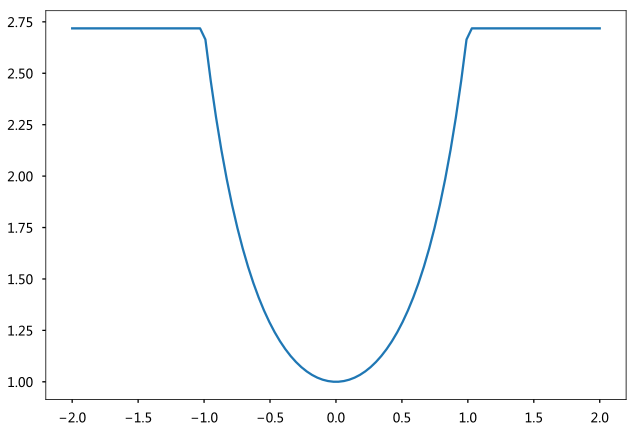

In [8]:
x = np.linspace(-2,2, 100).reshape((-1,1))
y = np.apply_along_axis(func, 1, x)
plt.plot(x, y)

In [9]:
n_samples = 10000
n_features = 10
X = np.random.randn(n_samples, n_features)
y = np.apply_along_axis(func, 1, X)

In [10]:
print X.shape, y.shape

(10000, 10) (10000,)


In [11]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(hidden_layer_sizes=(5, ))
clf.fit(X, y)
ypred = clf.predict(X)
print 'error', np.mean(np.abs(y - ypred))

clf2 = MLPRegressor(hidden_layer_sizes=(20, ))
clf2.fit(X, y)
ypred2 = clf2.predict(X)
print 'error', np.mean(np.abs(y - ypred2))


clf3 = MLPRegressor(hidden_layer_sizes=(200, ))
clf3.fit(X, y)
ypred3 = clf3.predict(X)
print 'error', np.mean(np.abs(y - ypred3))

clf4 = MLPRegressor(hidden_layer_sizes=(2000, ))
clf4.fit(X, y)
ypred4 = clf4.predict(X)
print 'error', np.mean(np.abs(y - ypred4))


error 0.176283816652
error 0.14022546849
error 0.118680368871
error 0.0486952890704


Text(0.5,1,u'hidden_size=2000')

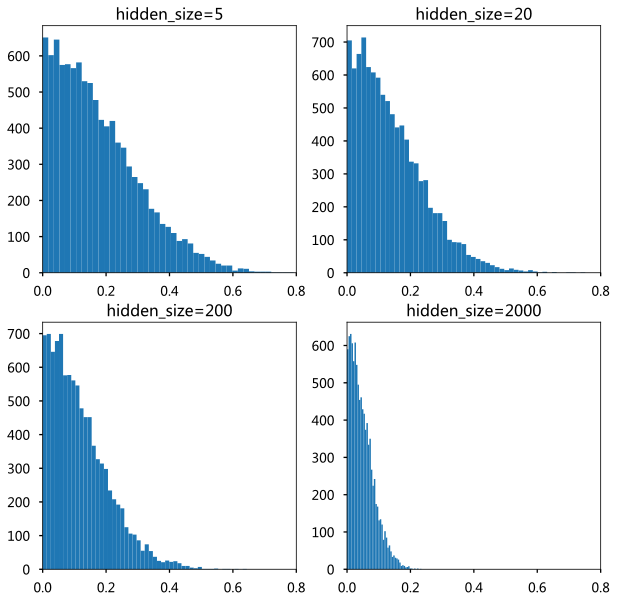

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.hist(np.abs(y-ypred), bins=50);
plt.xlim([0, 0.8])
plt.title('hidden_size=5')

plt.subplot(222)
plt.hist(np.abs(y-ypred2), bins=50);
plt.xlim([0, 0.8])
plt.title('hidden_size=20')


plt.subplot(223)
plt.hist(np.abs(y-ypred3), bins=50);
plt.xlim([0, 0.8])
plt.title('hidden_size=200')


plt.subplot(224)
plt.hist(np.abs(y-ypred4), bins=50);
plt.xlim([0, 0.8])
plt.title('hidden_size=2000')


## 总结
- 在这次课中，主要介绍了3个内容：
    1. 我们介绍了机器学习的两类基本问题：分类和回归
    2. 我们介绍了线性可分和线性不可分；线性相关和线性无关
    3. 举例说明了线性模型和非线性模型（神经网络）